In [5]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [69]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [7]:
tf.test.is_built_with_cuda()

True

In [9]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [57]:
fashion_mnist = keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [58]:

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

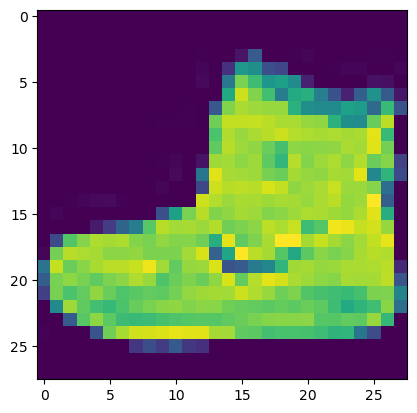

In [59]:
plt.imshow(X_train[0])

In [60]:
X_train.shape

(60000, 28, 28)

In [61]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [62]:
model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28,28)),
        keras.layers.Dense(3000, activation='relu'),
        keras.layers.Dense(1000, activation='relu'),
        keras.layers.Dense(10, activation='sigmoid')    
    ])

model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=1)

1875/1875 [==============================] - 51s 27ms/step - loss: 0.4714 - accuracy: 0.8298


In [63]:
np.argmax(model.predict(X_test)[0])

313/313 [==============================] - 2s 5ms/step


9

In [64]:
y_test[0]

9

In [86]:
def get_model():
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28,28)),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(63, activation='sigmoid')    
    ])

    model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    return model

In [91]:
%%timeit -n1 -r1 
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train, y_train, epochs=3,batch_size=32,validation_data=(X_test,y_test))

Epoch 1/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5921 - accuracy: 0.7980 - val_loss: 0.5129 - val_accuracy: 0.8176
Epoch 2/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4077 - accuracy: 0.8551 - val_loss: 0.4150 - val_accuracy: 0.8513
Epoch 3/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3685 - accuracy: 0.8675 - val_loss: 0.3765 - val_accuracy: 0.8646
15.3 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [92]:
%%timeit -n1 -r1 
with tf.device('/GPU:0'):
    gpu_model = get_model()
    gpu_model.fit(X_train, y_train, epochs=3,batch_size=32,validation_data=(X_test,y_test))
    

Epoch 1/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5630 - accuracy: 0.8079 - val_loss: 0.4387 - val_accuracy: 0.8417
Epoch 2/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3957 - accuracy: 0.8570 - val_loss: 0.4251 - val_accuracy: 0.8526
Epoch 3/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3625 - accuracy: 0.8685 - val_loss: 0.3833 - val_accuracy: 0.8590
23.7 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
